k- Nearest Neighbor is a classification algorithm, that works based on distance betweens the datapoints. When the class label of a new instance/ data point have to be predicted, its distance from all other data points are calculated, and the class label for 'k' nearest neighbours are considered for majority polling. Which ever class gets majority, it will be assigned as the label for the new instance.


#### Agenda
* Finding K - nearest neighbors manually
* Using Scikit Learn library to build kNN model

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#import warnings
#warnings.filterwarnings("ignore")

#### Read data
In this demo, we are going to work on defaulter dataset, where based on the customers' income and balance loan amoun to pay, a customer is going to be identified as defaulter or not

In [2]:
#reading data from input csv file
defaulter = pd.read_csv("datasets/defaulter.csv")
defaulter

,defaulter,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588
...,...,...,...,...
9995,No,No,711.555020,52992.37891
9996,No,No,757.962918,19660.72177
9997,No,No,845.411989,58636.15698
9998,No,No,1569.009053,36669.11236


#### Feature Engineering
Let us now look at the data to get insights on it, which will help us build a good model.

In [3]:
defaulter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   defaulter  10000 non-null  object 
 1   student    10000 non-null  object 
 2   balance    10000 non-null  float64
 3   income     10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


### Finding K - nearest neighbors manually

#### Loading a sample subset for illustration

In [4]:
#sample dataset with 10 data points
defaulter_subset = pd.read_csv("datasets/defaulter_subset.csv")

In [5]:
defaulter_subset

,defaulter,student,balance,income
0,No,Yes,817.1804,12106.14
1,Yes,Yes,1486.9980,17854.40
2,Yes,Yes,1102.4350,17391.78
3,Yes,Yes,1233.4460,12586.48
4,Yes,Yes,1276.6850,19282.44
5,Yes,Yes,1289.2460,13624.55
6,No,Yes,673.8124,17672.29
7,No,No,870.4124,17685.45
8,No,Yes,903.1768,15810.57
9,No,Yes,879.6270,14898.31


#### Visualizing the data

In [6]:
#visualizing data using seaborn - pariplot
import seaborn as sns

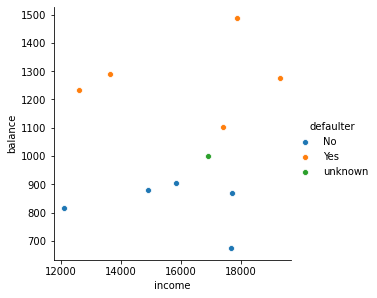

In [7]:
sns.pairplot(defaulter_subset,hue="defaulter",
             x_vars="income",y_vars="balance",height=4)

#### Finding the euclidean distance

In [8]:
# retrieving first data point from sample data
x1 = defaulter_subset.loc[0,["balance","income"]]

In [9]:
# retrieving second data point from sample data
x2 = defaulter_subset.loc[1,["balance","income"]]

In [10]:
# Euclidean distance between first and second data point
np.linalg.norm(x1-x2)

5787.1537602581275

#### Need for normalization of predictor variables

In [11]:
# considering 3 random datapoints - t1, t2, t3
t1 = np.array([26,1000])
t2 = np.array([66,1000])
t3 = np.array([36,10000])

In [12]:
# distance between t1 & t3
dist_t3_t1 = np.linalg.norm(t3-t1)
# distance between t2 & t3
dist_t2_t3 = np.linalg.norm(t2-t3)

print("Distance between t2 and t3",dist_t2_t3,
      "\nDistance between t1 and t3",dist_t3_t1)

Distance between t2 and t3 9000.049999861112 
Distance between t1 and t3 9000.00555555384


From the data points, we observe here that, t1 & t3 are comparitively closer (26 & 36 for x-values) than t2 & t3 (66 & 36 for x-values). But due to huge difference in scale between the x-values and y-values, significant difference is not seen in the distance calculated. So we need to normalize the data (bring all predictors to same scale) for better measure of distance between data points.

#### Normalizing the data using MinMaxScaler
<pre>
Normalizing feature 'A' using 'min_max' scaler:
    find the min and max values in feature 'A'
    new normalized value for field 'A'= (actual_value - min_value) / (max_value - min_value)
</pre>

In [13]:
# Using MinMaxScaler of Scikit Learn library for Normalization of all features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(defaulter_subset[["balance","income"]])
defaulter_subset["norm_balance"] = scaled_values[:,0]
defaulter_subset["norm_income"] = scaled_values[:,1]
defaulter_subset

,defaulter,student,balance,income,norm_balance,norm_income
0,No,Yes,817.1804,12106.14,0.176304,0.000000
1,Yes,Yes,1486.9980,17854.40,1.000000,0.801006
2,Yes,Yes,1102.4350,17391.78,0.527091,0.736541
3,Yes,Yes,1233.4460,12586.48,0.688199,0.066934
4,Yes,Yes,1276.6850,19282.44,0.741371,1.000000
5,Yes,Yes,1289.2460,13624.55,0.756818,0.211587
6,No,Yes,673.8124,17672.29,0.000000,0.775630
7,No,No,870.4124,17685.45,0.241765,0.777463
8,No,Yes,903.1768,15810.57,0.282057,0.516203
9,No,Yes,879.6270,14898.31,0.253097,0.389082


In [14]:
#distance between two normalized data points
x1_n = defaulter_subset.loc[0,["norm_balance","norm_income"]]
x2_n = defaulter_subset.loc[1,["norm_balance","norm_income"]]
np.linalg.norm(x1_n-x2_n)

1.1489497815843785

#### Sorting data based on distance to X11
* Now we can find the distance between unknown datapoint and the rest of the data points;
* find the k nearest neighbors, and based on majorty of neighbours' class, assign label for unknown datapoint.

In [15]:
# Lambda function to calculate Euclidean distance
x11 = defaulter_subset.loc[10,["norm_balance","norm_income"]] 
dist_to_X11 = lambda x: np.linalg.norm(x-x11)

In [16]:
# calculating Euclidean Distance
defaulter_subset["dist_toX11"] = defaulter_subset[["norm_balance",
                                               "norm_income"]].apply(dist_to_X11,axis=1)

In [17]:
# sorting the datapoints based on distance to find the 'k' nearest neighbors
defaulter_subset.sort_values("dist_toX11")

,defaulter,student,balance,income,norm_balance,norm_income,dist_toX11
10,unknown,Yes,1000.0000,16900.00,0.401123,0.668013,0.000000
2,Yes,Yes,1102.4350,17391.78,0.527091,0.736541,0.143401
8,No,Yes,903.1768,15810.57,0.282057,0.516203,0.192932
7,No,No,870.4124,17685.45,0.241765,0.777463,0.193325
9,No,Yes,879.6270,14898.31,0.253097,0.389082,0.315775
6,No,Yes,673.8124,17672.29,0.000000,0.775630,0.415309
4,Yes,Yes,1276.6850,19282.44,0.741371,1.000000,0.475378
5,Yes,Yes,1289.2460,13624.55,0.756818,0.211587,0.578657
1,Yes,Yes,1486.9980,17854.40,1.000000,0.801006,0.613466
3,Yes,Yes,1233.4460,12586.48,0.688199,0.066934,0.666114


### Using Scikit Learn library to build kNN model

#### Loading the data

In [18]:
#reading in data from csv file
defaulter = pd.read_csv("datasets/defaulter.csv")

#### Feature Engineering
Let us now look at the data to get insights on it, which will help us build a good model.

In [19]:
defaulter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   defaulter  10000 non-null  object 
 1   student    10000 non-null  object 
 2   balance    10000 non-null  float64
 3   income     10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


Here we shall normalize the balance and income columns in the data.

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
#applying MinMaxScaler to the default dataset
scaler = MinMaxScaler()
features_to_scale = ["balance","income"]
scaled_values = scaler.fit_transform(defaulter[features_to_scale])
defaulter["norm_balance"] = scaled_values[:,0]
defaulter["norm_income"] = scaled_values[:,1]

In [22]:
defaulter.head()

,defaulter,student,balance,income,norm_balance,norm_income
0,No,No,729.526495,44361.62507,0.274845,0.598905
1,No,Yes,817.180407,12106.13470,0.307868,0.155727
2,No,No,1073.549164,31767.13895,0.404453,0.425862
3,No,No,529.250605,35704.49394,0.199392,0.479959
4,No,No,785.655883,38463.49588,0.295991,0.517867


#### Splitting the data into train and test set

In [23]:
from sklearn.model_selection import train_test_split
X=defaulter[['norm_balance','norm_income']]
Y=defaulter['defaulter']

In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

In [25]:
X_train.shape, X_test.shape

((8000, 2), (2000, 2))

#### Building a kNN model using sklearn

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
#kNN with k=3
model = KNeighborsClassifier(n_neighbors=3,metric="euclidean")

In [28]:
model.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

#### Evaluating the train and test accuracies

In [29]:
train_accuracy = model.score(X_train,Y_train)
test_accuracy = model.score(X_test,Y_test)
print(train_accuracy,test_accuracy)

0.977375 0.967


#### Performance measured on different values of k

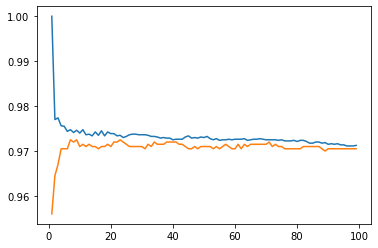

In [30]:
train_accuracies = []
test_accuracies = []
k_vals = [i for i in range(1,100)]
features = ["norm_balance","norm_income"]
target = "defaulter"
for k in k_vals:
    model = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    model.fit(X_train,Y_train)
    train_accuracy_k = model.score(X_train,Y_train)
    test_accuracy_k = model.score(X_test,Y_test)
    train_accuracies.append(train_accuracy_k)
    test_accuracies.append(test_accuracy_k)
plt.plot(k_vals,train_accuracies)
plt.plot(k_vals,test_accuracies)